In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import math


from sklearn import clone
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [13]:
whole_train = dd.read_csv('dataset/train.csv', parse_dates=['srch_ci', 'srch_co'])
train = whole_train.get_partition(1).head(10000)

In [14]:
train['nights'] = train['srch_co'] - train['srch_ci']
train['nights'] = train['nights'] / np.timedelta64(1, 'D')

for num in range(len(train['nights'])):
    if math.isnan(train['nights'].ix[num]) or train['nights'].ix[num] < 0:
        num1 = num - 1
        num2 = num + 1
        if train.ix[num]['user_id'] == train.ix[num1]['user_id'] and math.isnan(train['nights'].ix[num1]) == False:
            train['nights'].ix[num] = train.ix[num1]['nights']
            print 'is num1'
        elif train.ix[num]['user_id'] == train.ix[num2]['user_id'] and math.isnan(train['nights'].ix[num2]) == False:
            train['nights'].ix[num] = train.ix[num2]['nights']
            print 'is num2'
        else:
            break

is num1
is num2
is num1


In [ ]:
train['margin'] = train['srch_ci'] - train['date_time']
train['margin'] = train['margin'] / np.timedelta64(1, 'D')

for num in range(len(train['margin'])):
    if math.isnan(train['margin'].ix[num]) or train['margin'].ix[num] < 0:
        num1 = num - 1
        num2 = num + 1
        if train.ix[num]['user_id'] == train.ix[num1]['user_id'] and math.isnan(train['nights'].ix[num1]) == False:
            train['margin'].ix[num] = train.ix[num1]['margin']
            print 'is num1'
        elif train.ix[num]['user_id'] == train.ix[num2]['user_id'] and math.isnan(train['nights'].ix[num2]) == False:
            train['margin'].ix[num] = train.ix[num2]['margin']
            print 'is num2'
        else:
            break

In [15]:
del train['srch_ci']
del train['srch_co']
del train['date_time']

In [16]:
del train['site_name']
del train['user_id']
del train['orig_destination_distance']
# del train['user_location_city']
# del train['user_location_region']
# del train['user_location_country']
# del train['posa_continent']

# del train['is_package']
# del train['is_mobile']
# del train['channel']

# del train['srch_adults_cnt']
# del train['srch_children_cnt']
# del train['srch_rm_cnt']

# del train['srch_destination_id']
# del train['srch_destination_type_id']
# del train['is_booking']
# del train['cnt']

# del train['hotel_continent']
# del train['hotel_country']
# del train['hotel_market']
# del train['nights']

In [17]:
x = train.drop('hotel_cluster', axis=1)
y = train['hotel_cluster']

In [18]:
model = DecisionTreeClassifier().fit(x,y)
model_predict = model.predict(x)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [19]:
print classification_report(y, model_predict)

             precision    recall  f1-score   support

          0       0.05      0.07      0.06       122
          1       0.00      0.00      0.00        96
          2       0.00      0.00      0.00       151
          3       0.01      0.01      0.01        67
          4       0.01      0.01      0.01       115
          5       0.02      0.03      0.02       155
          6       0.01      0.01      0.01       119
          7       0.01      0.04      0.02        52
          8       0.00      0.02      0.01        46
          9       0.00      0.00      0.00       137
         10       0.00      0.00      0.00        85
         11       0.00      0.00      0.00        86
         12       0.00      0.00      0.00        56
         13       0.00      0.00      0.00       100
         14       0.00      0.00      0.00        47
         15       0.01      0.01      0.01        91
         16       0.01      0.01      0.01       138
         17       0.02      0.02      0.02   

In [20]:
print accuracy_score(y, model_predict)

0.0125


## Best : site_name, user_id, orig_distance

## 이제 최적의 Column을 찾아보자

In [ ]:
len(train.columns)

feature ranking
1. feature 13 (0.152805396478)
2. feature 16 (0.113346009833)
3. feature 10 (0.111323503118)
4. feature 3 (0.0948434564841)
5. feature 17 (0.0922008841613)
6. feature 2 (0.0741090376706)
7. feature 6 (0.0609233282172)
8. feature 7 (0.0488216683053)
9. feature 15 (0.0428459500575)
10. feature 11 (0.0396000210443)
11. feature 8 (0.0310301999211)
12. feature 1 (0.0290519525681)
13. feature 12 (0.0273415252921)
14. feature 14 (0.0260660743214)
15. feature 9 (0.0151709867659)
16. feature 4 (0.014306971582)
17. feature 5 (0.0133306086086)
18. feature 0 (0.0128824255717)


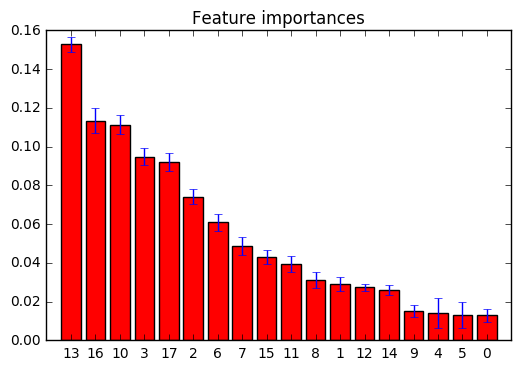

In [10]:
forest = ExtraTreesClassifier(n_estimators=22, random_state=0)
forest.fit(x,y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

print 'feature ranking'
for f in range(x.shape[1]):
    print '{}. feature {} ({})'.format(f+1, indices[f], importances[indices[f]])

plt.title('Feature importances')
plt.bar(range(x.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [ ]:
train.columns[3], train.columns[7]

In [ ]:
import seaborn as sns

sns.countplot(train['srch_rm_cnt'])
plt.show()